In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

In [2]:
pip install opencv-python


     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     --------------------------------------- 0.0/38.1 MB 653.6 kB/s eta 0:00:59
     ---------------------------------------- 0.2/38.1 MB 1.6 MB/s eta 0:00:24
     ---------------------------------------- 0.4/38.1 MB 2.9 MB/s eta 0:00:14
     - -------------------------------------- 1.0/38.1 MB 5.2 MB/s eta 0:00:08
     - -------------------------------------- 1.9/38.1 MB 8.0 MB/s eta 0:00:05
     --- ------------------------------------ 2.9/38.1 MB 10.1 MB/s eta 0:00:04
     ---- ----------------------------------- 4.6/38.1 MB 14.0 MB/s eta 0:00:03
     ----- ---------------------------------- 5.0/38.1 MB 13.3 MB/s eta 0:00:03
     ----- ---------------------------------- 5.2/38.1 MB 13.9 MB/s eta 0:00:03
     ----- ---------------------------------- 5.2/38.1 MB 13.9 MB/s eta 0:00:03
     ------ --------------------------------- 6.6/38.1 MB 13.2 MB/s eta 0:00:03
     --------- ------------------------------ 9.5/3

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [2]:
img = cv2.imread('data/bird.jpg') # 匯入進來的顏色排序是BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 轉為RGB

## 1-1. cluster with only RGB values

In [3]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

(1024, 1024, 3)
[[163.22523269 197.72077299 120.58292219]
 [107.68180177  95.55200125  71.59172666]]
[[160.65614407 204.76021407 114.71593938]
 [ 58.42854051  55.2445542   46.16143568]
 [143.97548068 128.34427505  97.26347705]
 [184.00610208 182.8106834  165.01150081]]
[[163.40517885 211.8411175  117.65801511]
 [114.3793555   98.66387627  67.13717137]
 [170.01076761 164.1296741  142.27418024]
 [148.76872069 133.13280962 103.31548135]
 [ 37.95536673  40.26368907  40.90892359]
 [154.67432946 192.72908177 110.88944783]
 [198.39036097 199.4796293  187.13483146]
 [220.07691019 190.52496649  36.9041555 ]]
[[165.29791776 213.74080938 119.51086633]
 [163.3835973  152.83567267 129.16919288]
 [177.8290625  111.36640625  50.66328125]
 [ 25.42024004  26.97692845  26.16173386]
 [190.56548242 192.84172773 176.80792439]
 [140.78052057 182.26155691 107.42893127]
 [133.47622503 119.64762704  88.8545838 ]
 [ 45.56438767  56.69868307  69.74465736]
 [228.71781646 203.08467655  37.26262626]
 [159.1329528  

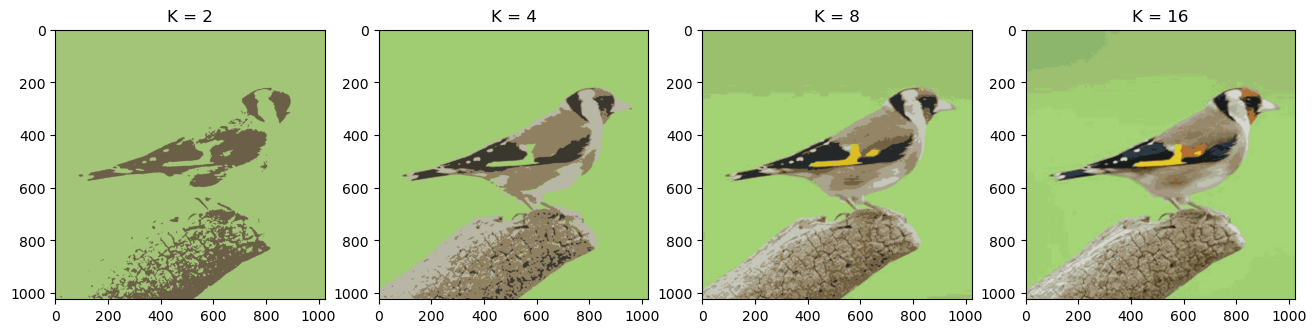

In [4]:
h, w, c = img.shape
print(img.shape)  # 高 寬 通道數(RGB) (1024, 1024, 3)
Z = img.reshape((-1,3)) #(1048576, 3)
Ka = [2,4,8,16]
plt.figure(figsize= (16,12))

for i,K in enumerate(Ka) :
    label, center = km_clust(Z,K)
    # Now convert back into uint8, and make original image
    center = np.uint8(center[:,:3])
    res = center[label.flatten()] #flatten()可以將array轉換為一維陣列
    res = res.reshape(img.shape)
    
    plt.subplot(1,len(Ka),i+1)
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

In [17]:
label.shape

(1048576,)

In [18]:
label.flatten()  #flatten()可以將array轉換為一維陣列

array([0, 0, 0, ..., 0, 0, 0])

## 1-2. cluster with RGB values and the location

[[154.51793395 186.7876397  117.13753279 508.87813015 255.0564512 ]
 [156.3735766  180.05256083 110.32011903 514.11237551 767.01491321]]
[[157.08439    178.89915035 122.7198735  768.25668673 256.70197363]
 [155.56612136 177.50116309 109.31930275 255.48957019 765.89045277]
 [151.82390937 194.01064066 111.31614674 255.9504468  254.11914936]
 [157.31132501 183.29193989 111.52933975 767.16560566 768.92315197]]
[[152.14327758 194.3214387  111.62693635 170.4720615  172.0290974 ]
 [143.87193484 143.31737853  97.96237767 514.57502474 604.48519455]
 [161.17259746 186.32741961 117.21936096 241.27184015 876.32313796]
 [165.23065312 189.48282965 135.34063845 848.76533574 170.66342273]
 [157.91892297 199.31447393 110.22163998 171.25044128 527.11723823]
 [162.32310596 206.48076301 118.06729577 779.76060933 875.57463602]
 [144.41877504 143.45891399 102.85411344 858.77328744 526.0939316 ]
 [154.65945085 199.33647919 115.94707583 511.01731943 205.65530716]]
[[147.2795673  187.79568907 109.63762176 121.

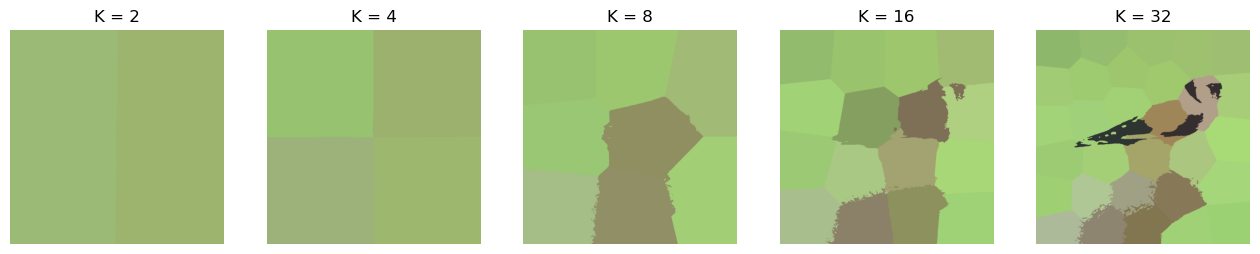

In [5]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

[[158.34002339 193.92413267 120.15152787 121.06782253  61.04585226]
 [152.87800802 174.07802711 108.01198256 133.92169061 187.23810343]]
[[167.57475974 206.16322731 123.01658289 169.3373085  211.84122401]
 [166.12532824 199.82507279 129.62815241 167.68267627  51.37993337]
 [157.90523469 192.7368765  112.34907521  45.77048703 124.68706975]
 [114.17815071 102.08077454  76.02897628 173.29469979 137.82099069]]
[[166.6154643  198.47374351 122.20732233  56.49364854 220.56491913]
 [162.75363569 145.24794903 105.975701   124.29624249 156.58822404]
 [164.59737117 211.37362875 120.34347732 194.55366943 212.38192346]
 [132.12550853 119.80206199  90.19297537 218.43721448 127.93333381]
 [156.22389374 200.99500271 114.55916727  67.66353184  41.70725529]
 [ 47.15917603  48.04930481  45.97057616 116.6614912  136.7131689 ]
 [167.98614462 200.41274115 133.60099514 188.15658105  53.05119008]
 [158.03635013 199.66703115 110.68577396  45.1647286  125.67528458]]
[[ 42.78969897  45.69228402  45.6774004  114.

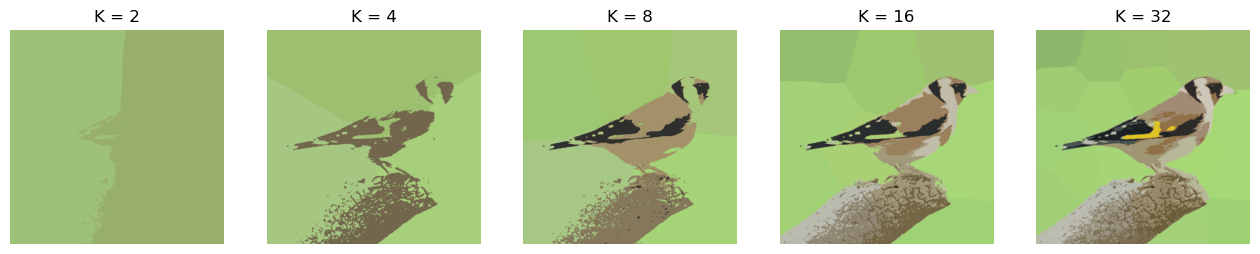

In [6]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()